In [1]:
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import shuffle
import random
from mpl_toolkits.mplot3d import Axes3D
import time

# Funciones de activacion

In [2]:
def derivada_relu(x):
  value=np.copy(x)
  value[value<=0] = 0
  value[value>0] = 1
  return value

In [3]:
relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

In [4]:
sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:np.exp(-x) / ((1 + np.exp(-x))**2)  #Derivada
  )

In [5]:
tangeteHiperbolica = (
  lambda x:(2/(1+np.exp(-2*x)))-1,
  lambda x:4*np.exp(-2*x)/((1+np.exp(-2*x))**2) #Derivada
  )

In [6]:
#solo aplicable para multiples salidas
softmax = (
    lambda x:np.exp(x)*np.transpose(np.ones((np.shape(x)[1], np.shape(x)[0]))*(1/np.sum(np.exp(x), axis=1)))
    )

### Gráficos de las funciones de activacion

In [7]:
def plot_funciones(rango, funcion, derivada):
  sns.set_style('darkgrid')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('FunciOn de activaciOn')
  plt.xlabel('Entrada')
  plt.ylabel('Salida')
  plt.plot(rango, funcion)
  plt.subplot(1,2,2)
  plt.title('Derivada de la funciOn de activaciOn')
  plt.plot(rango, derivada)

In [8]:
rango = np.linspace(-10,10).reshape([50,1])

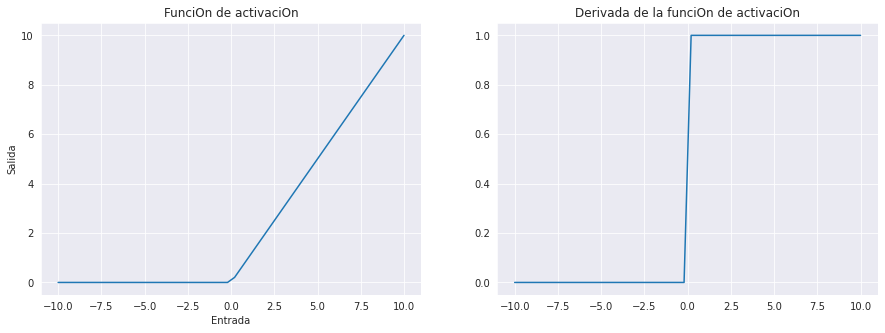

In [9]:
datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)

plot_funciones(rango, datos_relu, datos_relu_derivada)

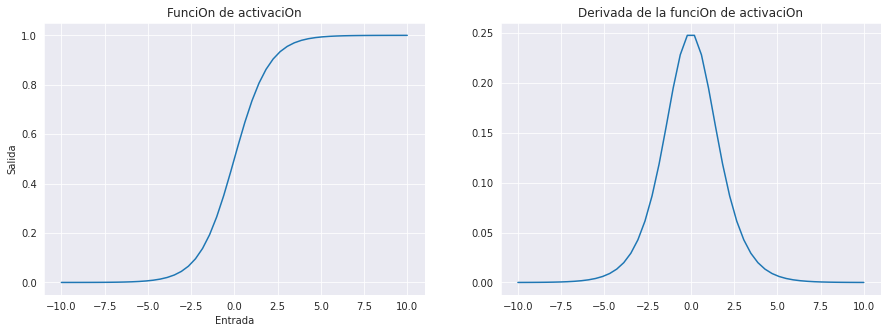

In [10]:
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

plot_funciones(rango, datos_sigmoide, datos_sigmoide_derivada)

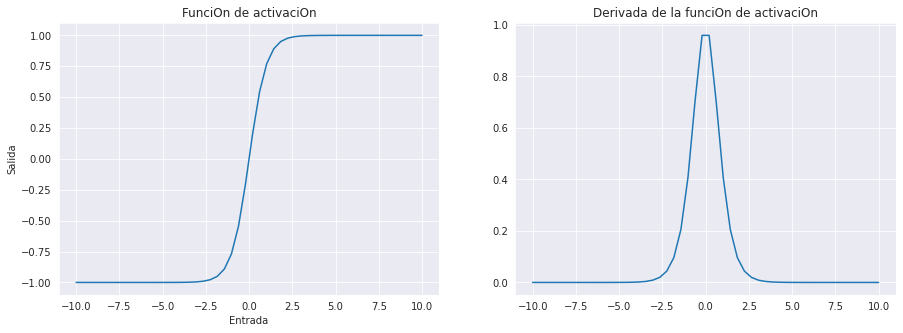

In [11]:
datos_tanh = tangeteHiperbolica[0](rango)
datos_tanh_derivada = tangeteHiperbolica[1](rango)

plot_funciones(rango, datos_tanh, datos_tanh_derivada)

### Datos de entrenamiento

In [12]:
def graficar_datos(data, label):
  sns.set_style('darkgrid')
  label=label[:,0]
  plt.figure(figsize=(6,5))
  plt.plot(X[label==0,0], X[label==0,1],'.r')
  plt.plot(X[label==1,0], X[label==1,1],'.b')
  plt.title('Conjunto de datos')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

In [13]:
def datos_divididos(no_muestras, No_variables, Ruido=0.5):
  Xs = np.round(np.random.randn(no_muestras, No_variables),3)
  #Ruido aleatorio
  Nx=(np.random.rand(*Xs.shape)-0.5)*Ruido                                      
  labels = np.array(((Xs[:,0]+Nx[:,0])>(Xs[:,1]+Nx[:,1])).astype('int')).reshape(no_muestras,1)
  return Xs, labels

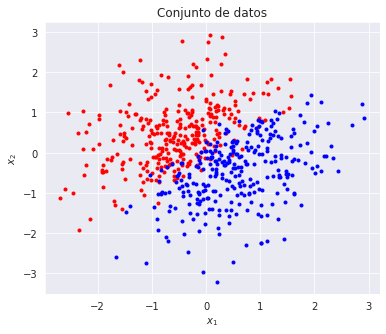

In [14]:
muestras=600              #Muestras y observaiones
no_prueb=int(muestras/4)  #numero de observaciones de prueba
No_var = 2                #Numero de variables de entrada o caracterísicas
percen = 0.8              #Porcentaje de ruido

X, Y = datos_divididos(muestras, No_var, percen)
X_test, Y_test=datos_divididos(no_prueb, No_var, percen)

graficar_datos(X,Y)

# Red Neuronal Artificial

función para construir las capas con pesos iniciados aleatoriamente

In [15]:
class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

Definiendo el número de capas y el número de neuronas por capa. La primera capa debe tener el mismo tamaña que número de características de los datos, i.e., dos entradas para las variables $x_1$ y $x_2$. Además, la primera capa no tiene función de activación.

In [16]:
#capas y neuronas
neuronas = [No_var,4,1] 

#Funciones de activacion de las capas ocultas 
funciones_activacion = [relu,relu, tangeteHiperbolica]

In [17]:
#Construccion de la red
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

### Primera capa
Multiplicacion y suma de los pesos

In [18]:
z = X @ red_neuronal[0].W

print('Primeras tres muestras :\n', z[:3,:], '\n')
print('Entrada a la capa :', X.shape)
print('Salida de la capa :', z.shape)

Primeras tres muestras :
 [[-0.498306  0.536262 -0.171848 -0.310805]
 [ 1.076817 -2.052554 -0.675584 -1.73502 ]
 [-1.292481  1.560254 -0.247376 -0.350182]] 

Entrada a la capa : (600, 2)
Salida de la capa : (600, 4)


pesos

In [19]:
red_neuronal[1].W

array([[-0.142],
       [ 0.531],
       [ 0.127],
       [ 0.076]])

Suma del sesgo (bias)

In [20]:
z = z + red_neuronal[0].b
print('Primeras tres muestras:\n', z[:3,:], '\n')

Primeras tres muestras:
 [[ 0.392694  0.750262 -0.892848 -0.423805]
 [ 1.967817 -1.838554 -1.396584 -1.84802 ]
 [-0.401481  1.774254 -0.968376 -0.463182]] 



Operación con la función de activacion 

In [21]:
a = red_neuronal[0].funcion_act[0](z)
print('Primeras tres muestras:\n', a[:3,:], '\n')

Primeras tres muestras:
 [[ 0.392694  0.750262 -0.       -0.      ]
 [ 1.967817 -0.       -0.       -0.      ]
 [-0.        1.774254 -0.       -0.      ]] 



### Salida de la última capa

In [22]:
output = [X]

#Iteraciones de todas las capas (La entrada de una capa es la salida de la anterior)
for num_capa in range(len(red_neuronal)):
  z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b
  a = red_neuronal[num_capa].funcion_act[0](z)
  output.append(a)

print('Salida de la red de las tres primeras muestras :\n', output[-1][:3])
print('Forma de la salida: ', np.shape(output[-1]))

Salida de la red de las tres primeras muestras :
 [[ 0.36462657]
 [-0.        ]
 [ 0.96412887]]
Forma de la salida:  (600, 1)


### Error de la red (Pérdida) y Regularización

In [23]:
def pesos(net):
  Ws=[]
  for i in net:  
    Ws=np.append(Ws,(i.W).reshape(((i.W).size,1)))
  return Ws

In [24]:
def mse(Ypredich, Yreal, net, Regularizacion='None', lambda_0=0.3):
  reg=0
  if Regularizacion=='L1':
    wi=pesos(net)
    reg=np.sum(np.abs(wi))/len(wi)

  if Regularizacion=='L2':
    wi=pesos(net)
    reg=np.sum(wi**2)/(2*len(wi))

  # Cálculo del error (Pérdida)
  x = ((np.array(Ypredich)-np.array(Yreal))**2)+lambda_0*reg
  x = np.mean(x)

  # Cálculo de la derivada
  Dx = np.array(Ypredich) - np.array(Yreal)
  return (x, Dx)

Pérdida sin regularización

In [25]:
mse(output[-1], Y, red_neuronal)[0]

0.3850182581464506

Pérdida con regularización L1

In [26]:
mse(output[-1], Y, red_neuronal, 'L1')[0]

0.49961825814645056

# Backpropagation

Pesos y sesgos de la última capa oculta

In [27]:
print('Sesgo de la Ultima capa oculta:\n ', red_neuronal[-1].b)
print('Pesos de la Ultima capa oculta :\n ', red_neuronal[-1].W)

Sesgo de la Ultima capa oculta:
  [[0.022]]
Pesos de la Ultima capa oculta :
  [[-0.142]
 [ 0.531]
 [ 0.127]
 [ 0.076]]


Propagación hacia atras de la ultima capa (la derivada está en definida como el segundo posición de las funciones de activación)

In [28]:
a = output[-1]
x = mse(a,Y, red_neuronal)[1] * red_neuronal[-2].funcion_act[1](a) #Derivada
print(x[:3,:])

[[ 0.36462657]
 [-0.        ]
 [ 0.96412887]]


# Gradient Descent
Optimizar respecto al error de la última capa

In [29]:
red_neuronal[-1].b = red_neuronal[-1].b - x.mean() * 0.01           #0.01 Tasa de aprendizaje
red_neuronal[-1].W = red_neuronal[-1].W - (output[-1].T @ x) * 0.01 #0.01 Tasa de aprendizaje

red_neuronal[-1].b
red_neuronal[-1].W

array([[-0.31996344],
       [ 0.35303656],
       [-0.05096344],
       [-0.10196344]])

# Propagación hacia atras en toda la red 

In [30]:
# Tasa de aprendizaje learning rate
lr = 0.05

# Indice inverso para ir de atras hacia adelante en la red
back = list(range(len(output)-1))
back.reverse()

# Vector delta para almacenar los errores en cada capa
delta = []

for capa in back:
  # Backpropagation #

  # Resultados de la ultima capa antes de usar backpropagation para poder usarlas en gradient descent
  a = output[capa+1][1]

  # Backpropopation en la ultima capa 
  if capa == back[0]:
    x = mse(a,Y, red_neuronal)[1] * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Backpropagation en el resto de capas 
  else:
    x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
    delta.append(x)

  # Valores de W para poder usarlos en la iteracion siguiente
  W_temp = red_neuronal[capa].W.transpose()

  # Gradient Descent #

  # Ajustamos los valores de los parametros de la capa
  red_neuronal[capa].b = red_neuronal[capa].b - delta[-1].mean() * lr
  red_neuronal[capa].W = red_neuronal[capa].W - (output[capa].T @ delta[-1]) * lr


print('MSE: ' + str(mse(output[-1],Y, red_neuronal)[0]) )
print('Estimacion: ' + str(output[-1][:5]) )

MSE: 0.3850182581464506
Estimacion: [[ 0.36462657]
 [-0.        ]
 [ 0.96412887]
 [-0.        ]
 [-0.        ]]


# Experimento completo

In [31]:
def entrenamiento(X,Y, red_neuronal, lr = 0.01, reg='None'):

  # Output guardara el resultado de cada capa
  # En la capa 1, el resultado es el valor de entrada
  output = [X]

  for num_capa in range(len(red_neuronal)):
    z = output[-1] @ red_neuronal[num_capa].W + red_neuronal[num_capa].b

    a = red_neuronal[num_capa].funcion_act[0](z)

    # Agregar el resultado de la capa a output
    output.append(a)

  # Backpropagation

  back = list(range(len(output)-1))
  back.reverse()

  # Vector del error de la capa
  delta = []

  for capa in back:
    # Backprop #delta

    a = output[capa+1]

    if capa == back[0]:
      x = mse(a,Y, red_neuronal, reg)[1] * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    else:
      x = delta[-1] @ W_temp * red_neuronal[capa].funcion_act[1](a)
      delta.append(x)

    W_temp = red_neuronal[capa].W.transpose()

    # Gradient Descent #
    red_neuronal[capa].b = red_neuronal[capa].b - np.mean(delta[-1], axis = 0, keepdims = True) * lr
    red_neuronal[capa].W = red_neuronal[capa].W - output[capa].transpose() @ delta[-1] * lr

  return output[-1]

In [32]:
def get_network(no_neuronas, funciones_act):
  class capa():
    def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
      self.funcion_act = funcion_act
      self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
      self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

  neuronas = no_neuronas
  funciones_activacion = funciones_act
  net = []

  for paso in list(range(len(neuronas)-1)):
    x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
    net.append(x)

  return net

In [33]:
def metrica_evaluacion(y_pred, y_test, metric):
  y_hat=np.round(y_pred)
  TP=np.sum((y_hat==1)*(y_test==1))
  TN=np.sum((y_hat==0)*(y_test==0))
  FP=np.sum((y_hat==1)*(y_test==0))
  FN=np.sum((y_hat==0)*(y_test==1))

  if metric=='Accuracy':
    value=(TP+TN)/(TP+TN+FP+FN)
  if metric=='Sensitivity':
    value=(TP)/(TP+FN)
  if metric=='Specificity':
    value=(TN)/(TN+FP)
  if metric=='Precision':
    value=(TP)/(TP+FP)
  if metric=='F1':
    value=(2*TP)/(2*TP+FP+FN)
  if metric=='FPR':
    value=(FP)/(TN+FP)
  if metric=='FNR':
    value=(FN)/(TP+FN)

  return value

In [34]:
def run_experiment(no_neuronas, funciones_act, reg='None', lambda_0=0.01, metrica='Accuracy', no_epoch=1000):
  red_neuronal=get_network(no_neuronas, funciones_act)
  error = []
  predicciones = []

  tic=time.time()
  for epoch in range(0, no_epoch):
    ronda = entrenamiento(X = X ,Y = Y ,red_neuronal = red_neuronal, lr = 0.001)
    predicciones.append(ronda)
    temp = mse(np.round(predicciones[-1]),Y, red_neuronal, reg, lambda_0)[0]
    error.append(temp)
    print('\rEpoch :', epoch, end='')
  toc=time.time()-tic
  print('\nEntrenamiento finalizado')

  epoch = list(range(0,no_epoch))
  plt.plot(epoch, error)

  #Evaluación datos de test
  predi = entrenamiento(X = X_test ,Y = Y_test, red_neuronal = red_neuronal, lr = 0.001)
  valid = mse(np.round(predi),Y_test, red_neuronal)[0]
  acc=metrica_evaluacion(predi, Y_test, metrica)

  print('Perdida ultima epoca    : ', error[-1])
  print('Perdida datos de prueba : ', valid)
  print('Tiempo de entrenamiento : ', toc)
  print('Metrica de evaluacion   :  '+metrica+'=', acc)

### Punto 1.1 Datos separados por una linea

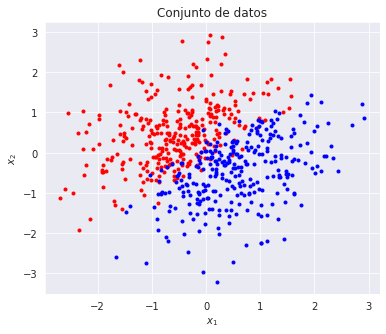

In [35]:
graficar_datos(X,Y)

### Diferentes perceptrones

Epoch : 999
Entrenamiento finalizado
Perdida ultima epoca    :  0.07666666666666666
Perdida datos de prueba :  0.04666666666666667
Tiempo de entrenamiento :  1.3892536163330078
Metrica de evaluacion   :  Accuracy= 0.9533333333333334


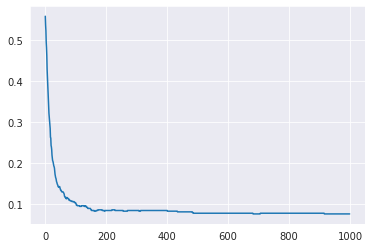

In [36]:
run_experiment([No_var,8,1], [sigmoid, sigmoid])